# Health-related sites in select provinces in the Philippines

Provinces included:
- Metro Manila (not a province)
- Cavite
- Pampanga
- Rizal

Files required:
- GADM Philippines: https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip
- Philippine Health Sites: https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [1]:
# Import required libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# We use the second dataset to break down each province into its cities and municipalities
ph = gpd.read_file('gadm36_PHL_shp/gadm36_PHL_2.shp')
ph.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,Bayan|Munisipyo,Municipality,140101,PH.AB.BN,"POLYGON ((120.62710 17.49300, 120.62177 17.493..."
1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.2_1,Boliney,None,None,Bayan|Munisipyo,Municipality,140102,PH.AB.BL,"POLYGON ((120.99042 17.39802, 120.98631 17.387..."
2,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.3_1,Bucay,None,None,Bayan|Munisipyo,Municipality,140103,PH.AB.BU,"POLYGON ((120.70788 17.45395, 120.70621 17.455..."
3,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.4_1,Bucloc,None,None,Bayan|Munisipyo,Municipality,140104,PH.AB.BC,"POLYGON ((120.78956 17.41699, 120.78922 17.445..."
4,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.5_1,Daguioman,None,None,Bayan|Munisipyo,Municipality,140105,PH.AB.DG,"POLYGON ((120.92917 17.41307, 120.92464 17.413..."


(116.444486621, 127.089197159, 3.7627797585, 21.894300891500002)

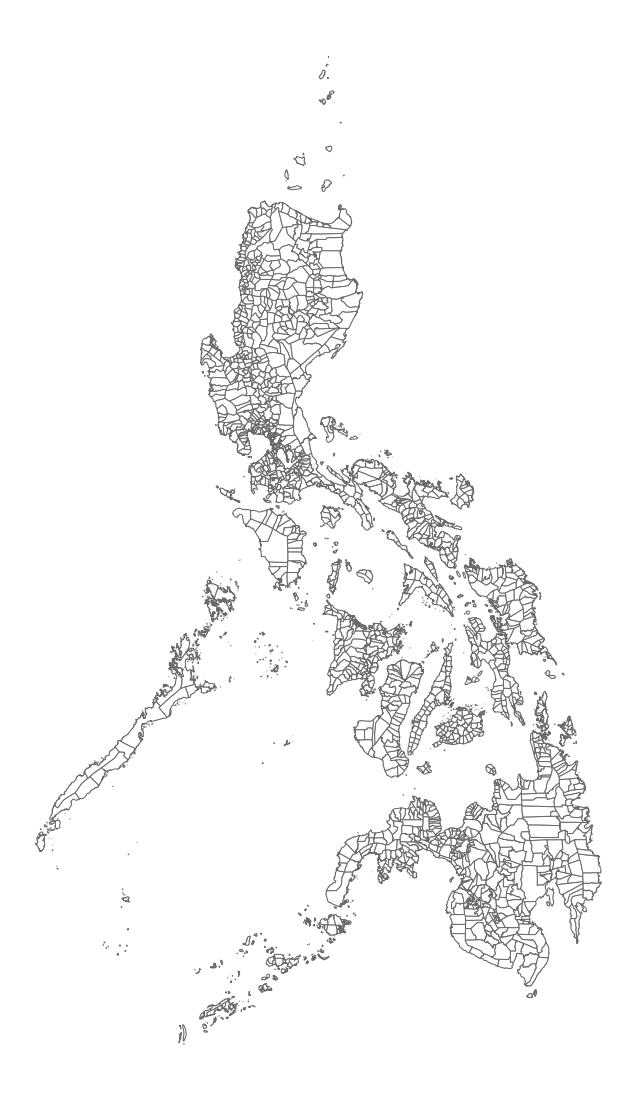

In [3]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")
ax.axis('off')

In [4]:
healthsites = gpd.read_file('philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


In [5]:
types = [
    ('pharmacy', 'Pharmacies'),
    ('hospital', 'Hospitals'),
    ('clinic', 'Clinics'),
    ('doctors', 'Doctors'),
    ('dentist', 'Dentists'),
    ('healthcare', 'Healthcare centers'),
    ('laboratory', 'Laboratories'),
    ('social_facility', 'Social facilities'),
    ('', 'Other health sites'),
]

Pharmacies: 957
Hospitals: 282
Clinics: 532
Doctors: 53
Dentists: 228
Healthcare centers: 52
Laboratories: 0
Social facilities: 0
Other health sites: 160
Overall: 2264


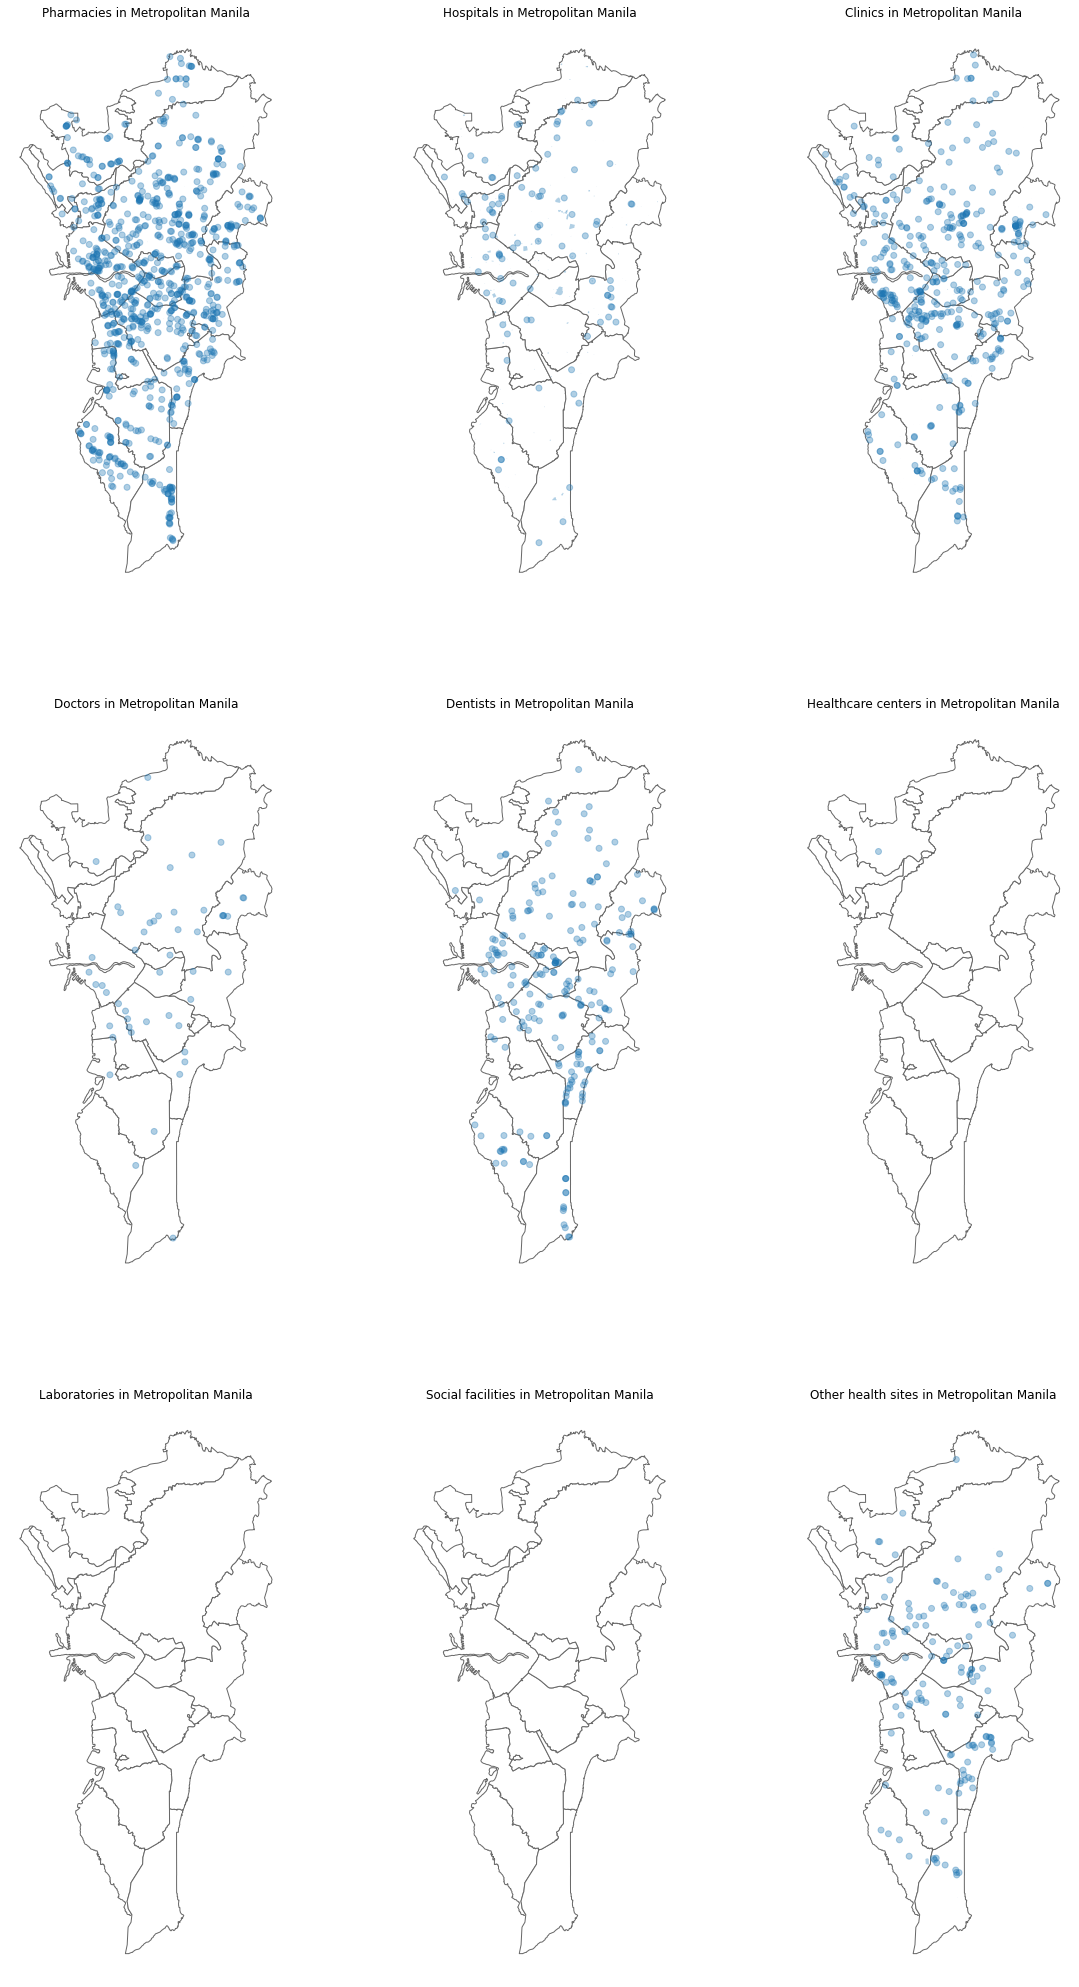

In [6]:
province_name = 'Metropolitan Manila'
province = ph[ph.NAME_1 == province_name]

fig = plt.figure(figsize=(20, 36))
type_idx = 1
total_count = 0

for val in types:
    ax = fig.add_subplot(3,3,type_idx)
    type_idx += 1

    sites_type = healthsites[healthsites.amenity == val[0]]
    sites = gpd.sjoin(sites_type, province, op='within')
    province.plot(ax=ax, color='white', edgecolor='dimgray')
    if not sites.empty:
        sites.plot(ax=ax, column="amenity", alpha=0.35)
        
    count = len(sites.squeeze())
    total_count += count
    print(val[1] + ": " + str(count))
    
    ax.set_title(val[1] + ' in ' + province_name)
    ax.axis('off')
    
print("Overall: " + str(total_count))

Pharmacies: 108
Hospitals: 55
Clinics: 64
Doctors: 5
Dentists: 40
Healthcare centers: 0
Laboratories: 0
Social facilities: 0
Other health sites: 7
Overall: 279


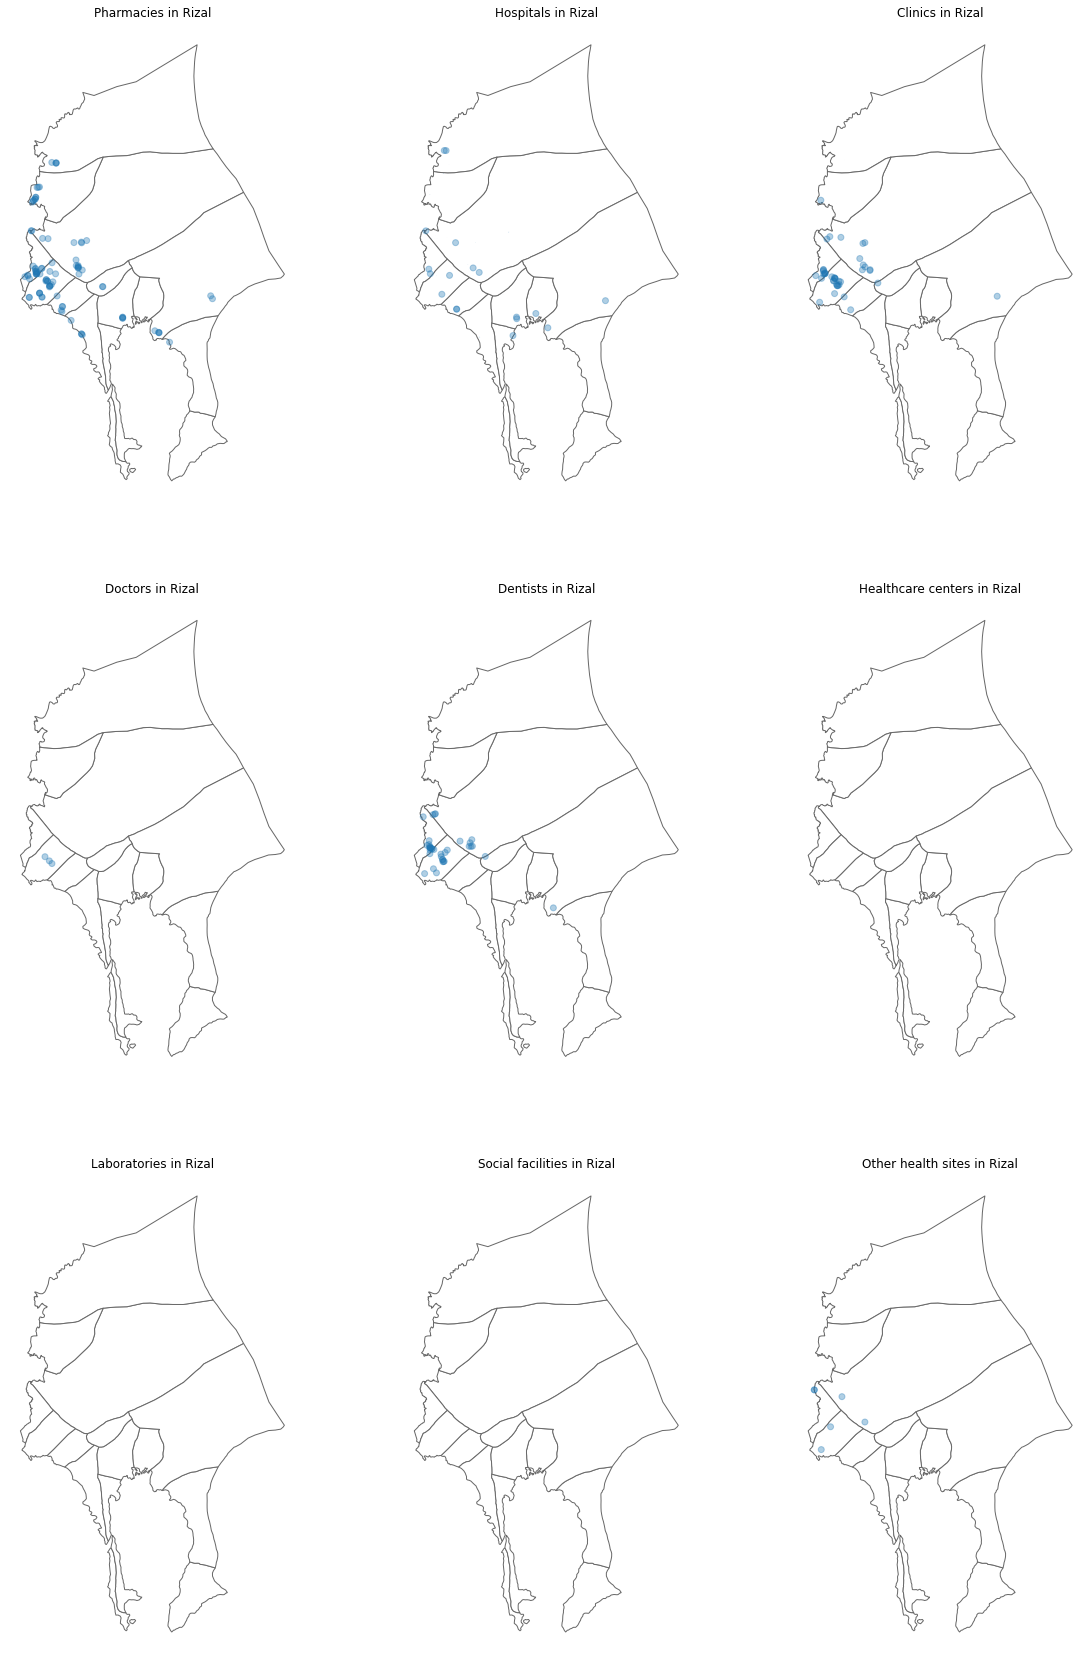

In [7]:
province_name = 'Rizal'
province = ph[ph.NAME_1 == province_name]

fig = plt.figure(figsize=(20, 30))
type_idx = 1
total_count = 0

for val in types:
    ax = fig.add_subplot(3,3,type_idx)
    type_idx += 1

    sites_type = healthsites[healthsites.amenity == val[0]]
    sites = gpd.sjoin(sites_type, province, op='within')
    province.plot(ax=ax, color='white', edgecolor='dimgray')
    if not sites.empty:
        sites.plot(ax=ax, column="amenity", alpha=0.35)
        
    count = len(sites.squeeze())
    total_count += count
    print(val[1] + ": " + str(count))
    
    ax.set_title(val[1] + ' in ' + province_name)
    ax.axis('off')
    
print("Overall: " + str(total_count))

Pharmacies: 234
Hospitals: 88
Clinics: 467
Doctors: 9
Dentists: 14
Healthcare centers: 0
Laboratories: 33
Social facilities: 0
Other health sites: 9
Overall: 854


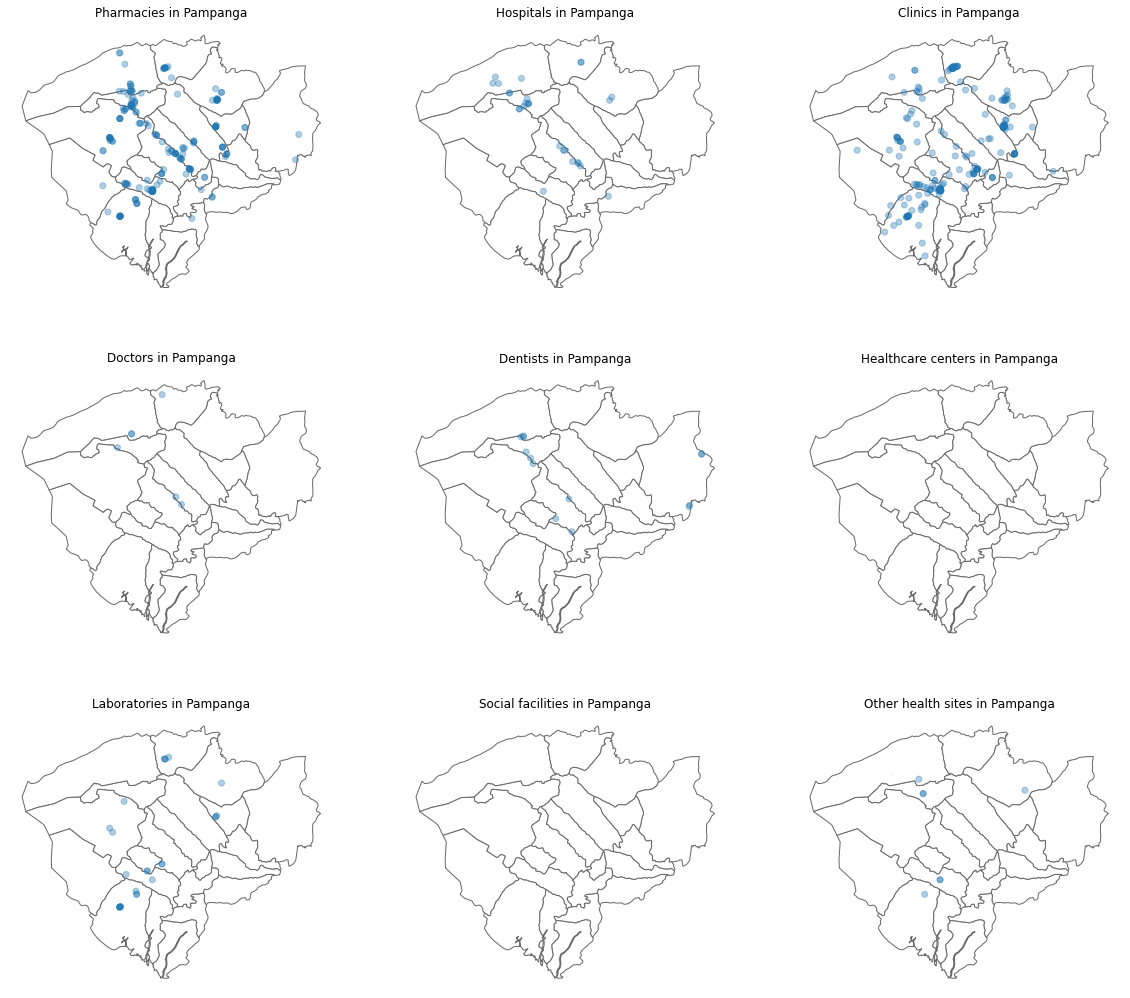

In [8]:
province_name = 'Pampanga'
province = ph[ph.NAME_1 == province_name]

fig = plt.figure(figsize=(20, 18))
type_idx = 1
total_count = 0

for val in types:
    ax = fig.add_subplot(3,3,type_idx)
    type_idx += 1

    sites_type = healthsites[healthsites.amenity == val[0]]
    sites = gpd.sjoin(sites_type, province, op='within')
    province.plot(ax=ax, color='white', edgecolor='dimgray')
    if not sites.empty:
        sites.plot(ax=ax, column="amenity", alpha=0.35)
        
    count = len(sites.squeeze())
    total_count += count
    print(val[1] + ": " + str(count))
    
    ax.set_title(val[1] + ' in ' + province_name)
    ax.axis('off')
    
print("Overall: " + str(total_count))

Pharmacies: 201
Hospitals: 91
Clinics: 71
Doctors: 15
Dentists: 49
Healthcare centers: 0
Laboratories: 0
Social facilities: 0
Other health sites: 9
Overall: 436


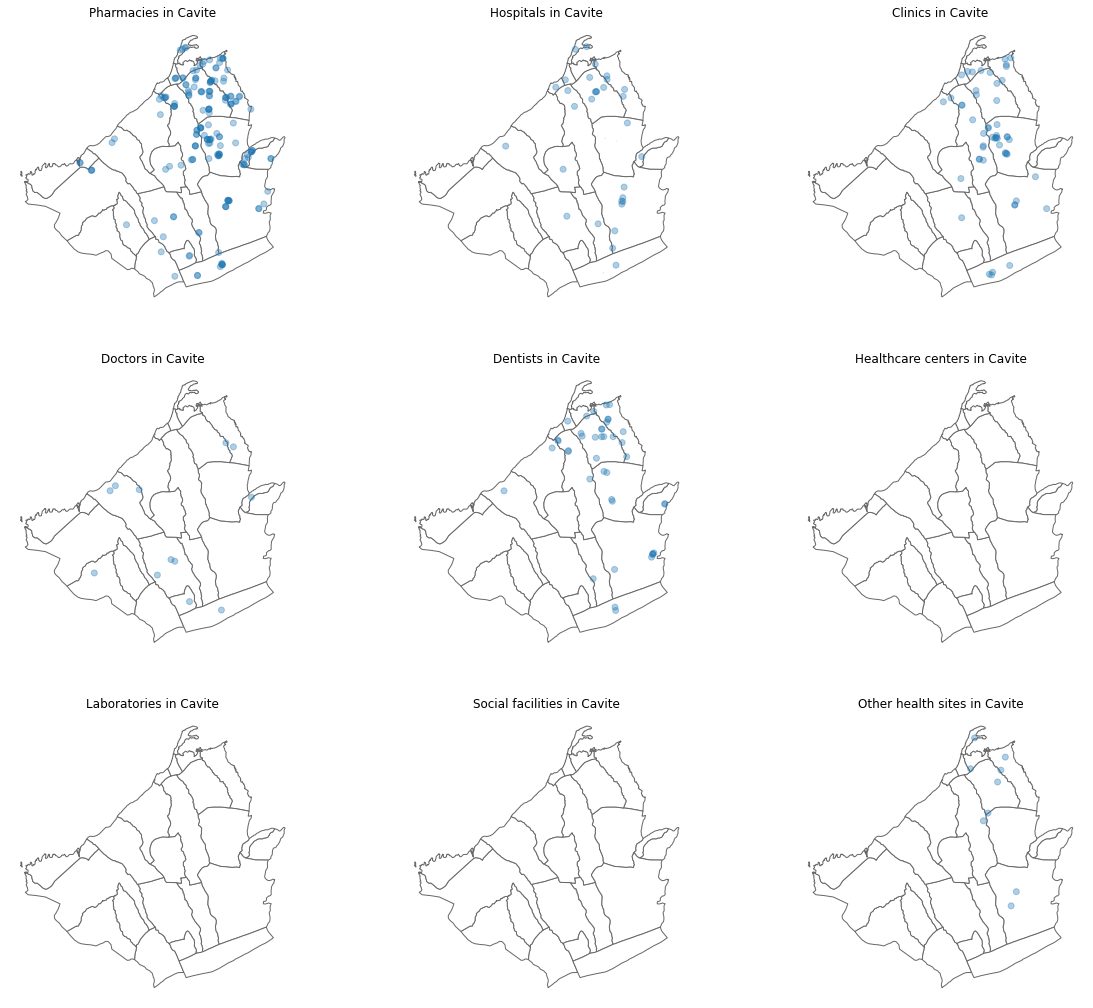

In [9]:
province_name = 'Cavite'
province = ph[ph.NAME_1 == province_name]

fig = plt.figure(figsize=(20, 18))
type_idx = 1
total_count = 0

for val in types:
    ax = fig.add_subplot(3,3,type_idx)
    type_idx += 1

    sites_type = healthsites[healthsites.amenity == val[0]]
    sites = gpd.sjoin(sites_type, province, op='within')
    province.plot(ax=ax, color='white', edgecolor='dimgray')
    if not sites.empty:
        sites.plot(ax=ax, column="amenity", alpha=0.35)
        
    count = len(sites.squeeze())
    total_count += count
    print(val[1] + ": " + str(count))
    
    ax.set_title(val[1] + ' in ' + province_name)
    ax.axis('off')
    
print("Overall: " + str(total_count))